<a href="https://colab.research.google.com/github/Leop250/Machine_learning/blob/main/projet_fin_de_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import

In [ ]:
import pandas as pd  # Lecture d'un fichier CSV
import numpy as np  # Opérations mathématiques
import seaborn as sns  # Graphiques tels que la matrice de corrélation
import matplotlib.pyplot as plt  # Pour l'affichage des graphiques
from sklearn.model_selection import train_test_split  # Pour séparer le jeu de données
from sklearn.linear_model import LinearRegression  # Pour effectuer la régression linéaire
from sklearn import metrics  # Utilisé pour calculer des métriques telles que l'accuracy
from sklearn.model_selection import cross_val_score  # Pour calculer la cross-validation
from sklearn.preprocessing import StandardScaler  # Utiliser l'objet StandardScaler
from sklearn.neighbors import KNeighborsClassifier  # Utilisé pour le modèle KNN


Dans cette partie du code nous importons les biblothèques néssecaire

## Lecture du fichier

In [ ]:
df = pd.read_csv('bienetre.csv')  # Ici, nous importons le fichier CSV
df_scaled = df.copy()  # Nous créons une copie du fichier afin de faire des tests et modifications
df_scaled.drop('target', inplace=True, axis=1)  # Nous retirons la colonne target (colonne solution)
print(df_scaled.head())  # Nous vérifions que la colonne target a bien été retirée


         age      taille      poids       revenu  experience  education  \
0  76.378818  172.472900  93.637574  2317.284189   23.187146   2.524067   
1  39.629339  162.527782  88.071856  2740.909189   26.742305   3.136856   
2  36.506832  196.457696  85.160759  3541.036636   20.895824   4.282662   
3  50.016190  174.829299  72.362368  3093.794975   26.155986   3.007974   
4  60.743330  171.536491  54.874865  2113.805284   14.771488   2.780533   

         imc    stress  nb_enfants     depenses  exercice  alimentation  \
0  24.544095  5.805570         1.0  1429.244924       4.0      6.128322   
1  26.805875  3.970287         1.0  1694.538136       1.0      6.068320   
2  24.218407  2.312967         0.0  3094.685811       3.0      6.503321   
3  23.452811  5.387465         0.0  1344.690334       3.0      6.015851   
4  26.065223  6.859302         1.0  1626.714555       3.0      5.344601   

    sommeil    pression  cholesterol  activite  satisfaction     risque  \
0  7.656376  129.058650

Pour resumer dans cette partie Nous importons le fichier CSV et l'affichons pour valider son importation après les modifications importer


## Afficher la matrice de convolution

### Normalisation Standard

---



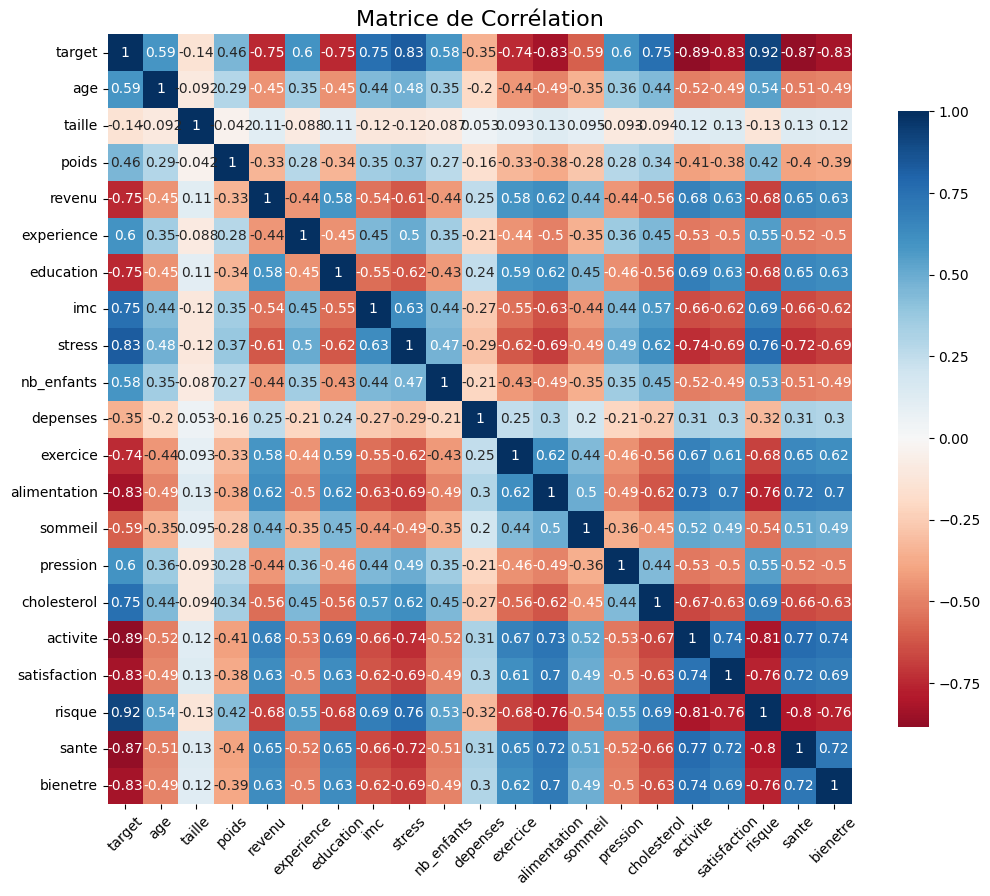

In [ ]:
correlation_matrix = df.corr()  # Nous initialisons la matrice de corrélation avec le fichier df

plt.figure(figsize=(12, 10))  # Nous définissons la taille de la matrice
sns.heatmap(correlation_matrix, annot=True, center=0, cmap='RdBu', cbar_kws={"shrink": .8})
# Grâce à Seaborn, nous créons la matrice de corrélation

plt.title('Matrice de Corrélation', fontsize=16)  # Ajout d'un titre
plt.xticks(rotation=45)  # Configuration de l'axe X
plt.yticks(rotation=0)  # Configuration de l'axe Y
plt.show()  # Affichage de la matrice


In [ ]:
df.describe() #nous ananlyson les données du fichier

,target,age,taille,poids,revenu,experience,education,imc,stress,nb_enfants,...,exercice,alimentation,sommeil,pression,cholesterol,activite,satisfaction,risque,sante,bienetre
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.800000,47.978640,170.535341,74.042819,2796.214262,19.032658,3.299494,25.621232,4.598669,1.836000,...,2.626100,6.402255,7.195132,123.047003,204.035817,5.796017,6.393817,44.145412,73.824255,6.402144
std,0.748369,12.457695,10.114769,13.341103,781.533488,6.242550,0.779620,3.380089,1.807880,1.217396,...,1.543353,1.804730,1.231426,12.549389,30.366382,2.163302,1.789406,24.605016,17.215520,1.797726
min,0.000000,7.587327,129.436247,31.449135,275.978543,-6.476955,1.000000,16.595884,-0.817043,0.000000,...,0.000000,1.000000,2.773131,79.364067,113.800424,1.000000,1.000000,0.000000,16.932014,0.699666
25%,0.000000,39.405573,163.740683,64.729830,2204.563230,14.697224,2.718558,23.240084,3.197705,1.000000,...,1.000000,5.101108,6.369437,114.360830,181.995873,4.113038,5.129324,23.080978,60.948984,5.114500
50%,1.000000,47.619796,170.490729,73.192735,2757.064229,18.971618,3.278090,25.314537,4.489886,2.000000,...,3.000000,6.502440,7.214413,122.755603,202.548092,5.651046,6.484931,43.577995,76.565336,6.499488
75%,1.000000,56.637883,177.275880,82.251508,3381.817122,23.292222,3.890786,27.579416,5.882468,3.000000,...,4.000000,7.805253,8.051258,131.595146,225.125376,7.684186,7.766372,60.885159,88.778946,7.787756
max,2.000000,93.773829,214.790843,140.374368,5363.916672,40.327629,5.000000,40.608144,10.605591,7.000000,...,8.000000,10.000000,11.331989,167.334076,305.815869,10.000000,10.000000,100.000000,100.000000,10.000000


In [ ]:
scaler = StandardScaler()  # Initialisation de l'objet StandardScaler, il sert à normaliser les données
X_scaled = scaler.fit_transform(df_scaled)  # Application du scaler sur le fichier df_scaled
X_scaled = pd.DataFrame(X_scaled, columns=df_scaled.columns)  # Nous transformons le fichier en DataFrame
X_scaled.head()  # Nous vérifions que X_scaled a bien fonctionné

df_scaled = X_scaled.copy()  # Création d'une copie du fichier normalisé
df_scaled['target'] = df['target']  # Ajout de la colonne 'target' originale
df_scaled.head()  # Vérification que la colonne 'target' est bien ajoutée


,age,taille,poids,revenu,experience,education,imc,stress,nb_enfants,depenses,...,alimentation,sommeil,pression,cholesterol,activite,satisfaction,risque,sante,bienetre,target
0,2.279844,0.191567,1.468824,-0.612839,0.665545,-0.994671,-0.318687,0.667612,-0.686746,-0.727963,...,-0.151793,0.374580,0.479063,0.822289,-0.606725,0.180294,0.075670,-0.161065,-0.874886,1
1,-0.670246,-0.791710,1.051618,-0.070768,1.235077,-0.208622,0.350494,-0.347597,-0.686746,-0.230451,...,-0.185042,-1.701328,-0.160035,1.288805,-0.410068,-0.932284,-0.051405,-0.518374,-0.226504,1
2,-0.920907,2.562951,0.833402,0.953074,0.298477,1.261149,-0.415047,-1.264363,-1.508213,2.395286,...,0.056003,0.696785,-1.179145,2.213298,0.558314,1.390604,-0.853248,0.774877,0.957294,0
3,0.163566,0.424545,-0.125967,0.380784,1.141150,-0.373944,-0.641560,0.436332,-1.508213,-0.886530,...,-0.214117,-1.049163,0.141935,0.509582,-0.566711,-0.447901,0.295409,-0.089794,-0.042210,1
4,1.024694,0.098984,-1.436831,-0.873210,-0.682635,-0.665691,0.131361,1.250496,-0.686746,-0.357642,...,-0.586075,-0.728784,-0.444839,0.679923,-0.300729,-0.688234,0.137607,-0.086171,-1.061694,1


In [ ]:
print(df_scaled.head())

        age    taille     poids    revenu  experience  education       imc  \
0  2.279844  0.191567  1.468824 -0.612839    0.665545  -0.994671 -0.318687   
1 -0.670246 -0.791710  1.051618 -0.070768    1.235077  -0.208622  0.350494   
2 -0.920907  2.562951  0.833402  0.953074    0.298477   1.261149 -0.415047   
3  0.163566  0.424545 -0.125967  0.380784    1.141150  -0.373944 -0.641560   
4  1.024694  0.098984 -1.436831 -0.873210   -0.682635  -0.665691  0.131361   

     stress  nb_enfants  depenses  ...  alimentation   sommeil  pression  \
0  0.667612   -0.686746 -0.727963  ...     -0.151793  0.374580  0.479063   
1 -0.347597   -0.686746 -0.230451  ...     -0.185042 -1.701328 -0.160035   
2 -1.264363   -1.508213  2.395286  ...      0.056003  0.696785 -1.179145   
3  0.436332   -1.508213 -0.886530  ...     -0.214117 -1.049163  0.141935   
4  1.250496   -0.686746 -0.357642  ...     -0.586075 -0.728784 -0.444839   

   cholesterol  activite  satisfaction    risque     sante  bienetre  targ

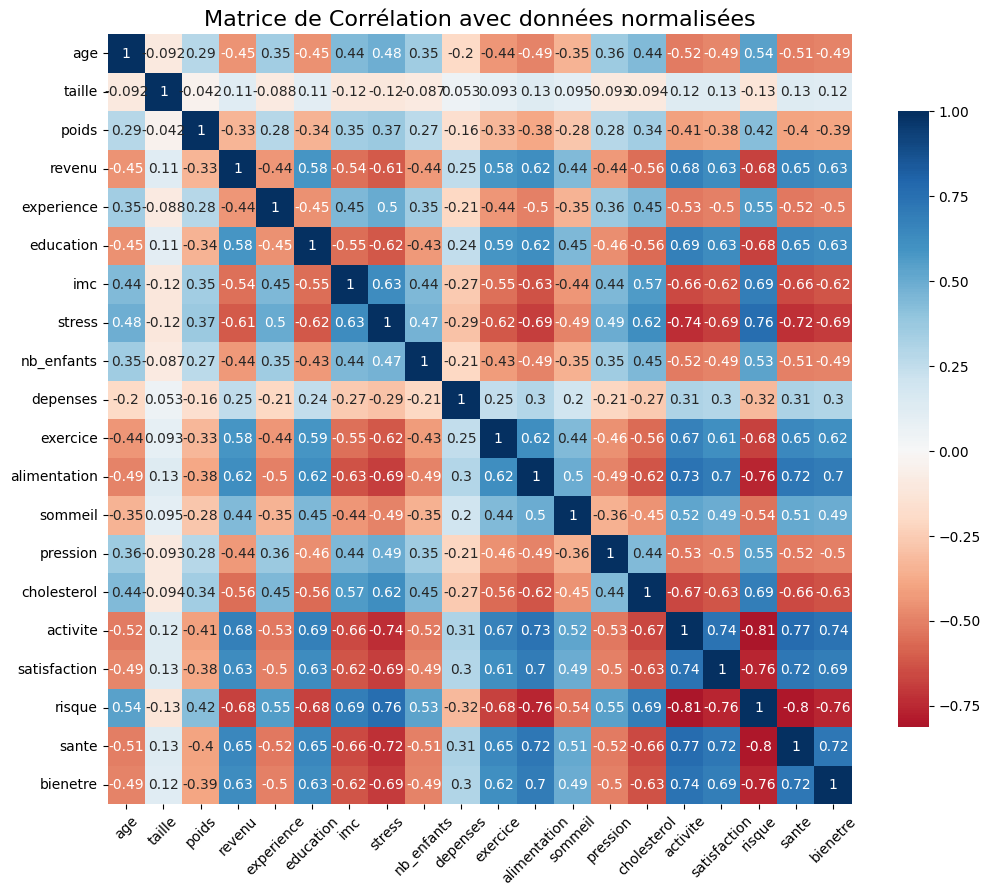

In [ ]:
correlation_matrix = X_scaled.corr()  # Nous faisons la même matrice de corrélation, mais avec les données normalisées

plt.figure(figsize=(12, 10))  # Nous définissons les dimensions
sns.heatmap(correlation_matrix, annot=True, center=0, cmap='RdBu', cbar_kws={"shrink": .8})
# Nous créons la matrice avec les paramètres à l'aide de Seaborn

plt.title('Matrice de Corrélation avec données normalisées', fontsize=16)  # Ajout d'un titre
plt.xticks(rotation=45)  # Configuration de l'axe des X
plt.yticks(rotation=0)  # Configuration de l'axe des Y
plt.show()  # Affichage de la matrice

Nous avons procédé à plusieurs étapes :

*   Normalisation des données
*   Suppression, pour la suite du TP, de la colonne target
*  Affichage de la matrice de corrélation pour identifier les colonnes les plus corrélées entre elles
*  DE plsu nous remarquons que avec les données normaliser nous gardons le presque les mme correlation entre les colonnes que non normalisé
:



### PCA

In [ ]:
from sklearn.decomposition import PCA #Importation de la PCA

In [ ]:
pca = PCA()  # Nous créons l'objet PCA
pca.fit(X_scaled)  # Nous procédons à la PCA sur X_scaled
explained_variance_ratio = pca.explained_variance_ratio_  # Nous affichons la variance de la PCA pour avoir une idée de la corrélation du jeu de données
X_pca = pca.transform(X_scaled)  # Puis nous transformons le fichier à l'aide de la PCA


In [ ]:
df_pca = pca.fit(df_scaled)  # Nous entraînons la PCA
df_pca = pca.transform(df_scaled)  # Nous transformons la PCA sur le fichier df_scaled

print(df_scaled.head())  # Nous affichons le fichier df_scaled


        age    taille     poids    revenu  experience  education       imc  \
0  2.279844  0.191567  1.468824 -0.612839    0.665545  -0.994671 -0.318687   
1 -0.670246 -0.791710  1.051618 -0.070768    1.235077  -0.208622  0.350494   
2 -0.920907  2.562951  0.833402  0.953074    0.298477   1.261149 -0.415047   
3  0.163566  0.424545 -0.125967  0.380784    1.141150  -0.373944 -0.641560   
4  1.024694  0.098984 -1.436831 -0.873210   -0.682635  -0.665691  0.131361   

     stress  nb_enfants  depenses  ...  alimentation   sommeil  pression  \
0  0.667612   -0.686746 -0.727963  ...     -0.151793  0.374580  0.479063   
1 -0.347597   -0.686746 -0.230451  ...     -0.185042 -1.701328 -0.160035   
2 -1.264363   -1.508213  2.395286  ...      0.056003  0.696785 -1.179145   
3  0.436332   -1.508213 -0.886530  ...     -0.214117 -1.049163  0.141935   
4  1.250496   -0.686746 -0.357642  ...     -0.586075 -0.728784 -0.444839   

   cholesterol  activite  satisfaction    risque     sante  bienetre  targ

📒  Nous avons procédé à la PCA, mais qu'est-ce que c'est et à quoi cela sert ? La PCA (Analyse en Composantes Principales) est un algorithme qui va réduire les données, les compresser, afin de réduire la dimensionnalité tout en conservant autant d'information que possible. Cela permet d'avoir des modèles qui fonctionnent de manière plus rapide.

In [ ]:
print(pca.explained_variance_ratio_)  # Nous affichons les différentes valeurs de la PCA, telles que la variance
print(pca.explained_variance_ratio_.cumsum())  # Nous affichons la somme cumulative de la variance expliquée
print(pca.explained_variance_ratio_)  # Affichage des valeurs de la variance expliquée de nouveau

[0.53565264 0.04781922 0.04266001 0.037956   0.03201033 0.03182289
 0.03134011 0.03087156 0.02951455 0.02340206 0.02100827 0.02037142
 0.02011083 0.01830587 0.0151754  0.01497781 0.01435587 0.0125585
 0.01087435 0.00840122 0.0008111 ]
[0.53565264 0.58347186 0.62613187 0.66408787 0.6960982  0.72792109
 0.75926121 0.79013277 0.81964732 0.84304938 0.86405764 0.88442907
 0.90453989 0.92284576 0.93802116 0.95299897 0.96735484 0.97991334
 0.99078768 0.9991889  1.        ]
[0.53565264 0.04781922 0.04266001 0.037956   0.03201033 0.03182289
 0.03134011 0.03087156 0.02951455 0.02340206 0.02100827 0.02037142
 0.02011083 0.01830587 0.0151754  0.01497781 0.01435587 0.0125585
 0.01087435 0.00840122 0.0008111 ]


Nous allons enssemble analyser le resutat que nous avons obtenue.

Ceci indique selon les component le pourcentage d'informatuion que cela represente:

*   La première composante principale explique 53.57 % de la variance
*   la deuxième 4.78 %
*   la troisième 4.27 %



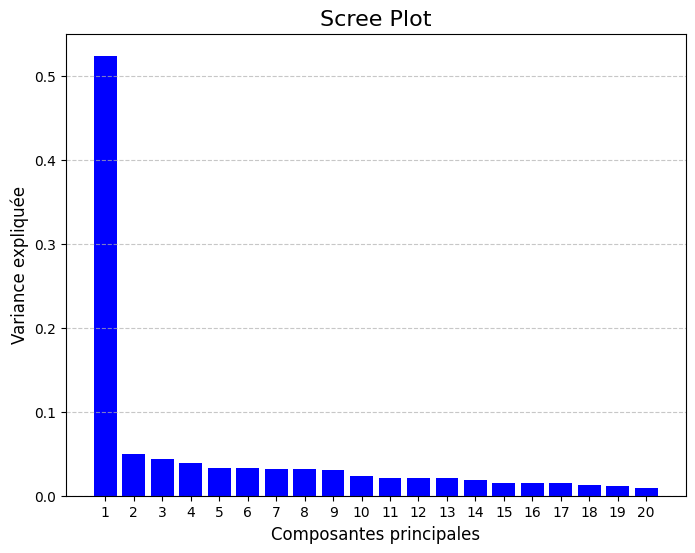

In [ ]:
plt.figure(figsize=(8, 6))  # Configuration de la taille du graphique
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, linewidth=2, color='blue')  # Création du graphique
plt.title('Scree Plot', fontsize=16)  # Nous créons un titre pour le graphique
plt.xlabel('Composantes principales', fontsize=12)  # Création d'un titre pour l'axe des X
plt.ylabel('Variance expliquée', fontsize=12)  # Création d'un titre pour l'axe des Y
plt.xticks(range(1, len(explained_variance_ratio) + 1))  # Configuration des graduations sur l'axe des X
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Ajout d'une grille sur l'axe Y
plt.show()  # Affichage du graphique



####Comment anamyser ce graphique ?

Par exemple, ici nous avons réduit la PCA, et avec une seule composante, nous avons plus de 50 % des informations du dataset. Ceci n'est pas énorme comparé à d'autres dataset où, parfois, nous pouvons atteindre 80 % d'information avec seulement deux composantes.


Par exemple pour avoir 95% de l'information du dataset nous besoins de 16 component

### Graph 2D/3D

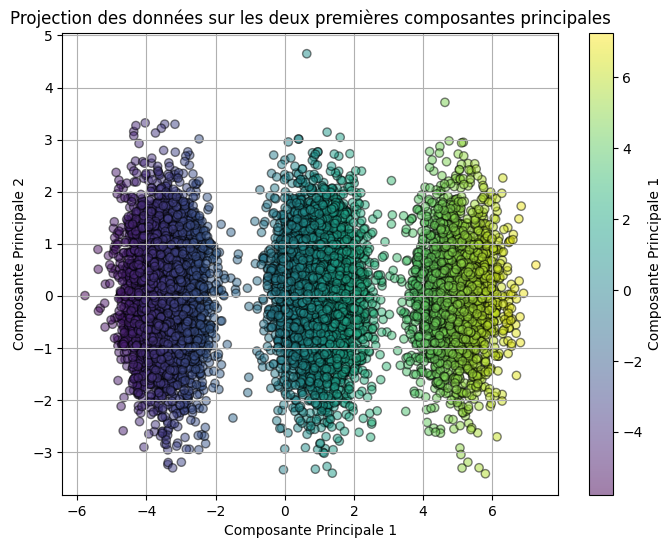

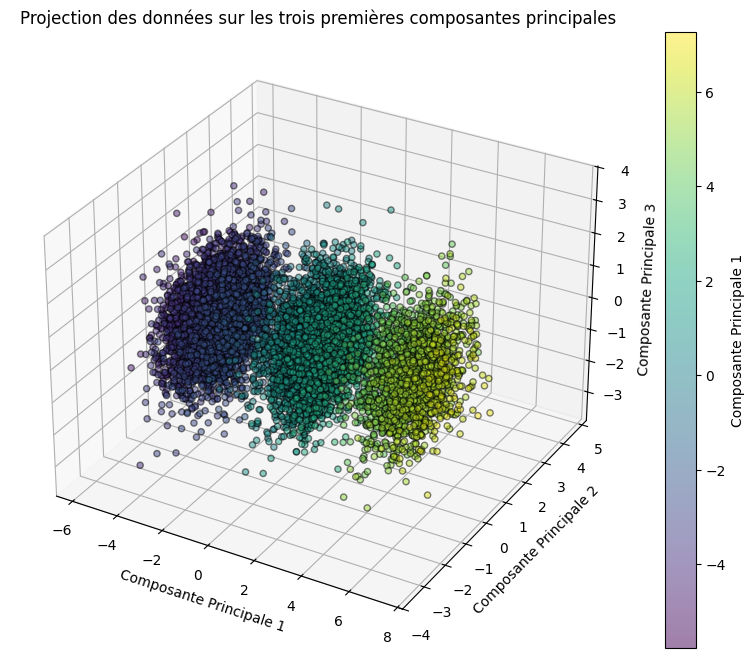

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # Import de la librairie qui permet de faire l'axe en 2D et 3D
import matplotlib.pyplot as plt  # Librairie utilisée pour afficher des graphiques

# Pour le graphique en 2D avec couleur
plt.figure(figsize=(8, 6))  # Configuration de la taille du graphique
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5, c=X_pca[:, 0], cmap='viridis', edgecolors='k')  # Configuration du graphique
plt.xlabel('Composante Principale 1')  # Titre pour l'axe des X
plt.ylabel('Composante Principale 2')  # Titre pour l'axe des Y
plt.title('Projection des données sur les deux premières composantes principales')  # Ajout d'un titre
plt.colorbar(label='Composante Principale 1')  # Ajout d'un titre à la légende
plt.grid()  # Ajout d'une grille
plt.show()  # Affichage du graphique

# Pour le graphique en 3D avec couleur
fig = plt.figure(figsize=(10, 8))  # Configuration de la taille du graphique
ax = fig.add_subplot(111, projection='3d')  # Graphique en 3D
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], alpha=0.5, c=X_pca[:, 0], cmap='viridis', edgecolors='k')  # Configuration des paramètres du graphique
ax.set_xlabel('Composante Principale 1')  # Ajout d'un titre à l'axe X
ax.set_ylabel('Composante Principale 2')  # Ajout d'un titre à l'axe des Y
ax.set_zlabel('Composante Principale 3')  # Ajout d'un titre à l'axe des Z
ax.set_title('Projection des données sur les trois premières composantes principales')  # Ajout d'un titre au graphique
plt.colorbar(sc, label='Composante Principale 1')  # Ajout d'un titre à la légende
plt.show()  # Affichage du graphique



### Validité des donnée de la PCA EN 2D et 3D

In [ ]:
pca_2d = PCA(n_components=2)  # Configuration de la PCA 2D
X_pca_2d = pca_2d.fit_transform(X_scaled)  # Nous définissons ici une variable pour stocker la PCA 2D

pca_3d = PCA(n_components=3)  # Configuration de la PCA 3D
X_pca_3d = pca_3d.fit_transform(X_scaled)  # Nous définissons ici une variable pour stocker la PCA 3D


Nous avons affiché les PCA en 2D et 3D. Celles-ci sont bien distinguables, ce qui pourrait conduire à une accuracy de 1 dans les prochains modèles, ce qui est normalement impossible.

## k-means

In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

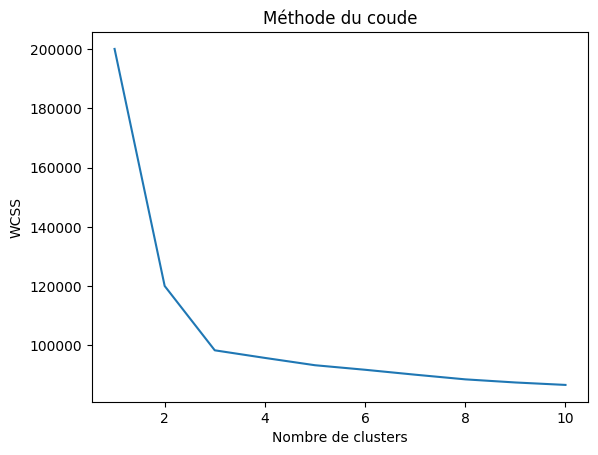

In [ ]:
from sklearn.cluster import KMeans  # Importation de la classe KMeans
wcss = []  # Liste pour stocker les valeurs de somme des carrés des distances intra-cluster

# Boucle pour tester le nombre de clusters de 1 à 10
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # Création du modèle KMeans
    kmeans.fit(X_scaled)  # Entraînement du modèle avec les données mises à l'échelle
    wcss.append(kmeans.inertia_)  # Ajout de somme des carrés des distances intra-cluster  à la liste

# Tracé de la méthode du coude
plt.plot(range(1, 11), wcss)  # Affichage de l'inertie pour chaque nombre de clusters
plt.title('Méthode du coude')  # Titre du graphique
plt.xlabel('Nombre de clusters')  # Légende de l'axe des X
plt.ylabel('WCSS')  # Légende de l'axe des Y (WCSS : Within-cluster sum of squares)
plt.show()  # Affichage du graphique


[1 1 0 ... 1 0 1]


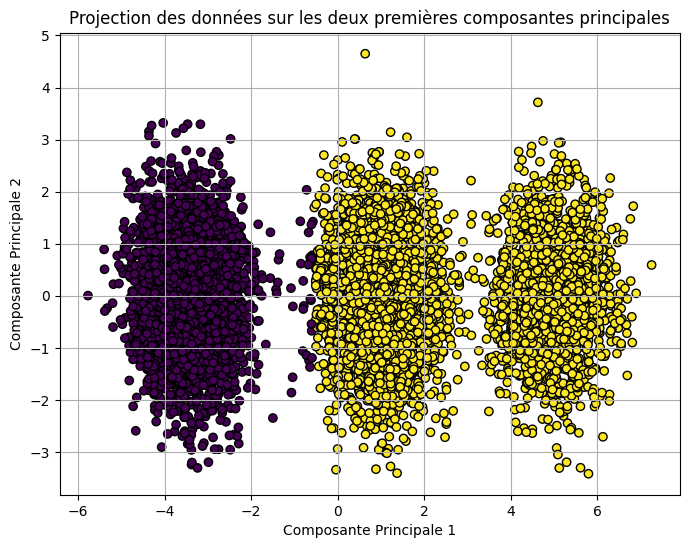

In [ ]:
kmeans = KMeans(n_clusters=2)  # Création du modèle K-means
kmeans.fit(X_pca_2d)  # Entraîner le K-means sur la PCA 2D
labels = kmeans.labels_  # Récupération des labels des clusters
print(labels)  # Affichage des labels

plt.figure(figsize=(8, 6))  # Création du graphique avec la taille du graphique
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', edgecolors='k')  # Configuration des paramètres du graphique
plt.xlabel('Composante Principale 1')  # Ajout d'un titre à l'axe des X
plt.ylabel('Composante Principale 2')  # Ajout d'un titre à l'axe des Y
plt.title('Projection des données sur les deux premières composantes principales')  # Ajout d'un titre
plt.grid()  # Activation de la grille
plt.show()  # Affichage du graphique


[2 2 1 ... 2 1 2]


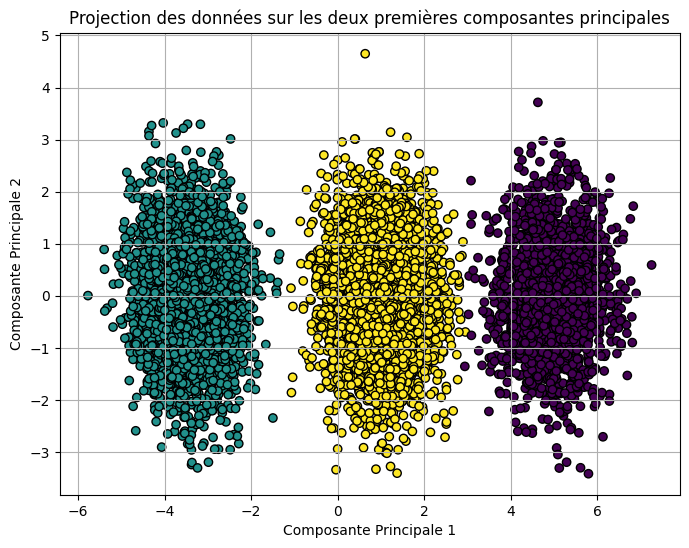

In [ ]:
kmeans = KMeans(n_clusters=3)  # Configuration du KMeans pour la PCA 3D
kmeans.fit(X_pca_3d)  # Entraîner le K-means sur la PCA en 3D
labels = kmeans.labels_  # Récupération des labels des clusters
print(labels)  # Affichage des labels

plt.figure(figsize=(8, 6))  # Création du graphique avec la taille du graphique
plt.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], c=labels, cmap='viridis', edgecolors='k')  # Configuration des paramètres du graphique
plt.xlabel('Composante Principale 1')  # Ajout d'un titre à l'axe des X
plt.ylabel('Composante Principale 2')  # Ajout d'un titre à l'axe des Y
plt.title('Projection des données sur les deux premières composantes principales')  # Ajout d'un titre
plt.grid()  # Activation de la grille
plt.show()  # Affichage du graphique


Nous avons un model de k-means mais qu'est ce que c'est ?


*   Le K-mean a un apprentissage non supervisé et permet de classifier en cluster. Son but est de diviser un ensemble de données en groupes, il a un hyperparamètre.
*   L'algo affecte les points dans des groupes en fonction d'un calcul sur leur proximité avec leur centre, et ajuste les centres à chaque itération en fonction des points du groupe.




### Cross Validation + Logistic regression

In [ ]:
X = df_scaled  # On définit dans X le fichier df_scaled
y = df['target']  # Attribution de la colonne solution à y
model = LogisticRegression()  # Création du modèle de régression logistique
model.fit(X, y)  # Nous l'entraînons pour prédire la colonne y => Target
y_pred = model.predict(X)  # Il essaye de la prédire avec X

scores_2D = cross_val_score(model, X_pca_2d, y, cv=5, scoring='accuracy')  # Validation sur les données projetées de la PCA 2D
print('Scores de validation croisée pour la PCA en 2D: ', scores_2D)  # Affichage des scores obtenus pour chaque itération de la PCA 2D
print('Score moyen de validation croisée: ', scores_2D.mean())  # Score moyen sur la PCA 2D

scores_3D = cross_val_score(model, X_pca_3d, y, cv=5, scoring='accuracy')  # Validation sur les données projetées de la PCA 3D
print('Scores de validation croisée pour la PCA en 3D: ', scores_3D)  # Affichage des scores obtenus pour chaque itération de la PCA 3D
print('Score moyen de validation croisée: ', scores_3D.mean())  # Score moyen sur la PCA 3D


Scores de validation croisée pour la PCA en 2D:  [0.999  0.9985 0.9975 0.9995 0.9985]
Score moyen de validation croisée:  0.9986
Scores de validation croisée pour la PCA en 3D:  [0.999  0.9985 0.9975 0.9995 0.9985]
Score moyen de validation croisée:  0.9986


Nous obtenons une très bonne accuracy de 99 % avec la PCA en 2D et 3D, ce qui signifie qu'il manque de bruit dans les données générées, car l'ajout d'une composante supplémentaire ne parvient pas à ajouter de manière significative de l'information.

#### Logistic Regression nombre de composante nesssesaire **(nécessaire si Léopold ne fait pas de fautes)** pour 95%


In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)  # Calcul de la somme cumulative de la variance expliquée par les composantes principales
num_components = np.argmax(cumulative_variance >= 0.95) + 1  # Recherche du nombre de composantes nécessaires pour atteindre 95% de variance cumulative
print(f'Nombre de composantes nécessaires pour atteindre 95% de variance cumulative: {num_components}')  # Affichage du résultat


Nombre de composantes nécessaires pour atteindre 95% de variance cumulative: 16


### ROC

In [ ]:
from sklearn.metrics import roc_curve, auc  # Librairies nécessaires pour la ROC
from sklearn.preprocessing import label_binarize  # Permet de convertir des labels multi-classes en un format binaire


In [ ]:
y_prob_3d = logistic_3d.predict_proba(X_pca_3d)  # Préparation de la régression logistique à l'aide de la PCA 3D

for i in range(n_classes):  # Boucle qui va itérer selon le nombre de classes après la binarisation
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob_3d[:, i])  # Calcul des taux de faux positifs et vrais positifs
    roc_auc = auc(fpr, tpr)  # Calcul de l'aire sous la courbe ROC
    plt.plot(fpr, tpr, label=f'PCA 3D - Classe {i} (AUC={roc_auc:.2f})')  # Permet de tracer la courbe

plt.plot([0, 1], [0, 1], 'k--')  # Permet de tracer la ligne diagonale représentant un classificateur aléatoire
plt.xlabel('Taux F+ (FPR)')  # Nom de l'axe des X
plt.ylabel('Taux V+ (TPR)')  # Nom de l'axe des Y
plt.title('Courbes ROC PCA 3D (OvsR)')  # Titre du graphique
plt.legend()  # Affichage de la légende
plt.grid()  # Ajout d'une grille sur le graphique
plt.show()  # Affichage du graphique



NameError: name 'logistic_3d' is not defined

Pourquoi la ROC est perpendiculaire avec une accuracy a 100% ❓

Nous obtenons une courbe ROC perpendiculaire, indiquant une accuracy de 1 en raison du peu de bruit. De plus, lors de la visualisation de la PCA, nous pouvons bien distinguer les valeurs elles-mêmes, sans chevauchement.


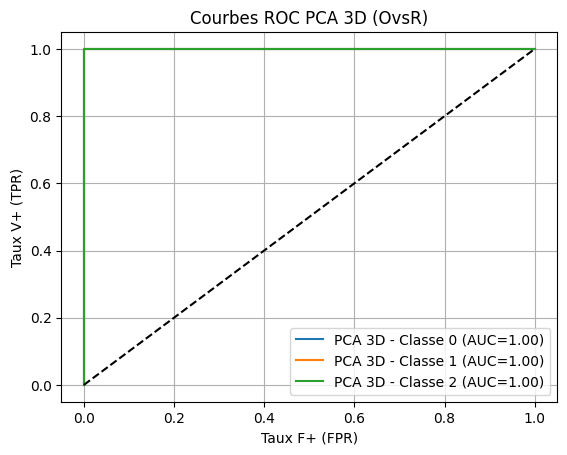

In [ ]:
from sklearn.metrics import roc_curve, auc  # Librairies nécessaires pour la courbe ROC
from sklearn.preprocessing import label_binarize  # Permet de convertir des labels en format binaire pour la classification multiclasse
from sklearn.linear_model import LogisticRegression  # Importation de LogisticRegression

logistic_3d = LogisticRegression()  # Création d'un objet LogisticRegression
logistic_3d.fit(X_pca_3d, y)  # Entraînement du modèle avec les données PCA 3D

y_prob_3d = logistic_3d.predict_proba(X_pca_3d)  # Préparation de la régression logistique à l'aide de la PCA 3D

# Obtention du nombre de classes
n_classes = len(np.unique(y))

# Binarisation des labels
y_bin = label_binarize(y, classes=np.unique(y))
for i in range(n_classes):  # Boucle qui va itérer selon le nombre de classes après la binarisation
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob_3d[:, i])  # Calcul des taux de faux positifs et vrais positifs
    roc_auc = auc(fpr, tpr)  # Calcul de l'aire sous la courbe ROC
    plt.plot(fpr, tpr, label=f'PCA 3D - Classe {i} (AUC={roc_auc:.2f})')  # Tracé de la courbe ROC pour chaque classe

plt.plot([0, 1], [0, 1], 'k--')  # Tracé de la ligne diagonale représentant un classificateur aléatoire
plt.xlabel('Taux F+ (FPR)')  # Nom de l'axe des X
plt.ylabel('Taux V+ (TPR)')  # Nom de l'axe des Y
plt.title('Courbes ROC PCA 3D (OvsR)')  # Titre du graphique
plt.legend()  # Affichage de la légende
plt.grid()  # Ajout d'une grille au graphique
plt.show()  # Affichage du graphique


### KNN

In [ ]:
from sklearn.model_selection import GridSearchCV  # Importation de GridSearchCV pour l'optimisation des hyperparamètres
from sklearn.neighbors import KNeighborsClassifier  # Importation du classificateur KNN

# Définition de la grille des hyperparamètres à tester
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21],  # Nombre de voisins, on choisit des nombres impairs pour éviter les égalités
    'weights': ['uniform', 'distance'],  # Pondération des voisins : 'uniform' ou 'distance'
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Métriques de distance : euclidienne, manhattan ou minkowski
}

# Création du classificateur KNN
knn = KNeighborsClassifier()

# GridSearchCV pour la PCA en 2D
grid_search_2d = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)  # Optimisation des hyperparamètres pour PCA 2D
grid_search_2d.fit(X_pca_2d, y)  # Entrainement du modèle avec la PCA 2D

# Affichage des meilleurs résultats pour la PCA 2D
print("Meilleurs paramètres (PCA 2D) :", grid_search_2d.best_params_)
print("Meilleur score (PCA 2D) :", grid_search_2d.best_score_)

# GridSearchCV pour la PCA en 3D
grid_search_3d = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)  # Optimisation des hyperparamètres pour PCA 3D
grid_search_3d.fit(X_pca_3d, y)  # Entrainement du modèle avec la PCA 3D

# Affichage des meilleurs résultats pour la PCA 3D
print("Meilleurs paramètres (PCA 3D) :", grid_search_3d.best_params_)
print("Meilleur score (PCA 3D) :", grid_search_3d.best_score_)


Meilleurs paramètres (PCA 2D) : {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Meilleur score (PCA 2D) : 0.9989000000000001
Meilleurs paramètres (PCA 3D) : {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Meilleur score (PCA 3D) : 0.999


Le Grid Search défini ici dans le modèle permet à un algorithme non supervisé de définir les meilleurs paramètres pour entraîner le modèle afin d’obtenir la meilleure accuracy

---



#### Déterminer le nombre de composantes nécessaires pour atteindre 95% de variance cumulative. avec le moddel KNN

In [ ]:
cumulative_variance = np.cumsum(explained_variance_ratio)
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Nombre de composantes nécessaires pour atteindre 95% de variance cumulative: {num_components}')

Nombre de composantes nécessaires pour atteindre 95% de variance cumulative: 16


###k-means

[0 0 1 ... 0 1 0]


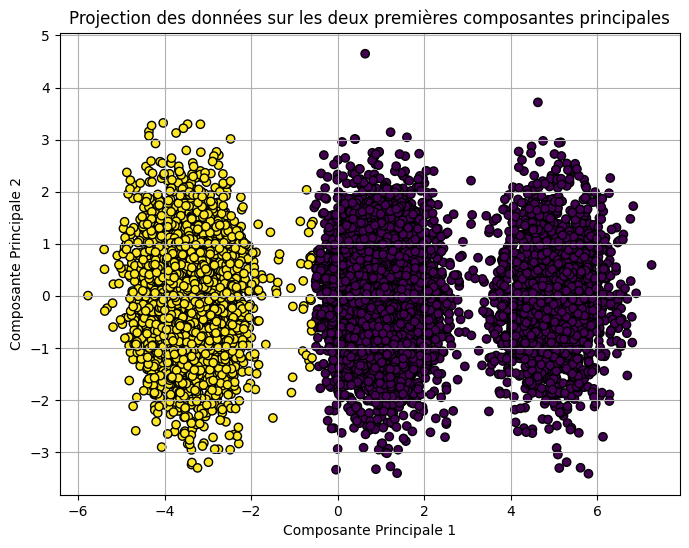

[1 1 0 ... 1 0 1]


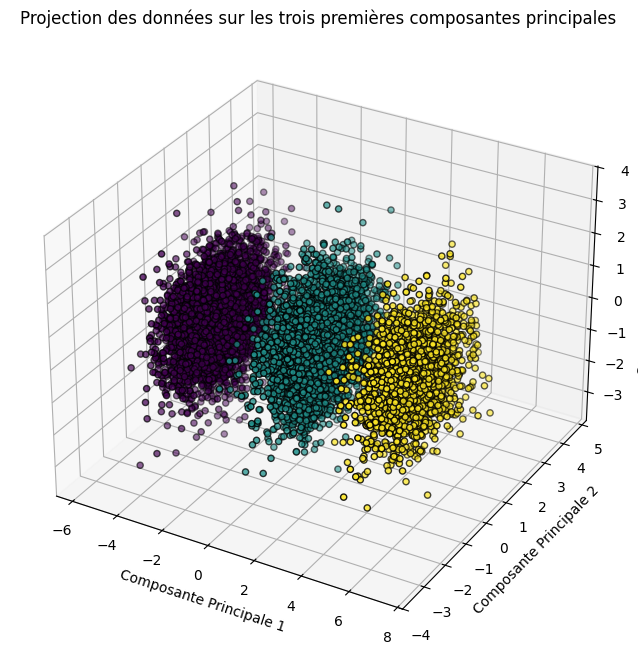

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_pca_2d)
labels = kmeans.labels_
print(labels)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=labels, cmap='viridis', edgecolors='k')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des données sur les deux premières composantes principales')
plt.grid()
plt.show()

# ----------------------------------------------------------------------------------------

kmeans_3D = KMeans(n_clusters=3)
kmeans_3D.fit(X_pca_3d)
labels = kmeans_3D.labels_
print(labels)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=labels, cmap='viridis', edgecolors='k')
ax.set_xlabel('Composante Principale 1')
ax.set_ylabel('Composante Principale 2')
ax.set_zlabel('Composante Principale 3')
ax.set_title('Projection des données sur les trois premières composantes principales')
plt.show() #permet d'afficher le graphique



### Régression Logistic PCA 2D/3D

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Création du modèle de régression logistique pour la PCA 2D
logistic_2d = LogisticRegression()
logistic_2d.fit(X_pca_2d, y)  # Entraînement du modèle avec les données PCA 2D
y_pred_2d = logistic_2d.predict(X_pca_2d)  # Prédiction avec la PCA 2D
accuracy_2d = metrics.accuracy_score(y, y_pred_2d)  # Calcul de l'accuracy du modèle avec la PCA 2D
print(f'Accuracy avec PCA 2D : {accuracy_2d:.4f}')  # Affichage de l'accuracy avec la PCA 2D

# Création du modèle de régression logistique pour la PCA 3D
logistic_3d = LogisticRegression()
logistic_3d.fit(X_pca_3d, y)  # Entraînement du modèle avec les données PCA 3D
y_pred_3d = logistic_3d.predict(X_pca_3d)  # Prédiction avec la PCA 3D
accuracy_3d = metrics.accuracy_score(y, y_pred_3d)  # Calcul de l'accuracy du modèle avec la PCA 3D
print(f'Accuracy avec PCA 3D : {accuracy_3d:.4f}')  # Affichage de l'accuracy avec la PCA 3D


Accuracy avec PCA 2D : 0.9987
Accuracy avec PCA 3D : 0.9987


Nous avons fait un code de régression logistique basé sur le modèle de la PCA en 2D et en 3D.

## KNN PCA 2D/3D

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Création du modèle KNN avec la PCA 2D et 3D
knn = KNeighborsClassifier(n_neighbors=5)

# Validation croisée (5-fold) pour la PCA 2D
knn_scores_2d = cross_val_score(knn, X_pca_2d, y, cv=5, scoring='accuracy')
print('Scores de validation croisée avec KNN pour la PCA 2D :', knn_scores_2d)  # Calcul des scores pour la validation avec la PCA 2D
print('Score moyen de validation croisée avec KNN pour la PCA 2D :', knn_scores_2d.mean())  # Calcul du score moyen pour la PCA 2D

# Validation croisée (5-fold) pour la PCA 3D
knn_scores_3d = cross_val_score(knn, X_pca_3d, y, cv=5, scoring='accuracy')
print('Scores de validation croisée avec KNN pour la PCA 3D :', knn_scores_3d)  # Calcul des scores pour la validation avec la PCA 3D
print('Score moyen de validation croisée avec KNN pour la PCA 3D :', knn_scores_3d.mean())  # Calcul du score moyen pour la PCA 3D


Scores de validation croisée avec KNN pour la PCA 2D : [0.999  0.999  0.997  0.9995 0.999 ]
Score moyen de validation croisée avec KNN pour la PCA 2D : 0.9987
Scores de validation croisée avec KNN pour la PCA 3D : [0.9985 0.999  0.9975 0.9995 0.9995]
Score moyen de validation croisée avec KNN pour la PCA 3D : 0.9988000000000001


Nous avons fait un code de KNN basé sur le modèle de la PCA en 2D et en 3D.




Le K-Nearest Neighbors (KNN) est un algorithme de classification simple et intuitif.
Il est basé sur le principe de proximité : un objet est classé en fonction de la majorité des classes de ses K voisins les plus proches.



In [ ]:
df_scaled_dataframe = pd.DataFrame(df_scaled)  # Je transforme mon df_scaled en un DataFrame pour pouvoir l'utiliser dans un arbre de décision
print(df_scaled_dataframe.head())  # Vérification pour voir si cela a bien fonctionné
print(df_scaled_dataframe["target"].head())  # Vérification de la présence de la colonne 'target' dans le DataFrame


        age    taille     poids    revenu  experience  education       imc  \
0  2.279844  0.191567  1.468824 -0.612839    0.665545  -0.994671 -0.318687   
1 -0.670246 -0.791710  1.051618 -0.070768    1.235077  -0.208622  0.350494   
2 -0.920907  2.562951  0.833402  0.953074    0.298477   1.261149 -0.415047   
3  0.163566  0.424545 -0.125967  0.380784    1.141150  -0.373944 -0.641560   
4  1.024694  0.098984 -1.436831 -0.873210   -0.682635  -0.665691  0.131361   

     stress  nb_enfants  depenses  ...  alimentation   sommeil  pression  \
0  0.667612   -0.686746 -0.727963  ...     -0.151793  0.374580  0.479063   
1 -0.347597   -0.686746 -0.230451  ...     -0.185042 -1.701328 -0.160035   
2 -1.264363   -1.508213  2.395286  ...      0.056003  0.696785 -1.179145   
3  0.436332   -1.508213 -0.886530  ...     -0.214117 -1.049163  0.141935   
4  1.250496   -0.686746 -0.357642  ...     -0.586075 -0.728784 -0.444839   

   cholesterol  activite  satisfaction    risque     sante  bienetre  targ

##Arbre de décision

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import GridSearchCV

# Création des classificateurs pour PCA 2D et 3D
clf_2d = DecisionTreeClassifier(random_state=42)
clf_3d = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [None, 10, 20, 30],  # Profondeur de l'arbre
    'min_samples_split': [2, 5, 10],  # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [1, 2, 4]     # Nombre minimum d'échantillons pour un noeud terminal
}

# GridSearch pour PCA 2D
grid_search_2d = GridSearchCV(clf_2d, param_grid, cv=5, scoring='accuracy')
grid_search_2d.fit(X_pca_2d, y)

# Résultats du GridSearch pour PCA 2D
print("Meilleur choix PCA 2D :", grid_search_2d.best_params_)
print("Meilleur score PCA 2D:", grid_search_2d.best_score_)

# GridSearch pour PCA 3D
grid_search_3d = GridSearchCV(clf_3d, param_grid, cv=5, scoring='accuracy')
grid_search_3d.fit(X_pca_3d, y)

# Résultats du GridSearch pour PCA 3D
print("Meilleur choix PCA 3D:", grid_search_3d.best_params_)
print("Meilleur score PCA 3D:", grid_search_3d.best_score_)

# Récupération des meilleurs modèles
best_clf_2d = grid_search_2d.best_estimator_
best_clf_3d = grid_search_3d.best_estimator_


Meilleur choix PCA 2D : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleur score PCA 2D: 0.9987999999999999
Meilleur choix PCA 3D: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Meilleur score PCA 3D: 0.9987999999999999


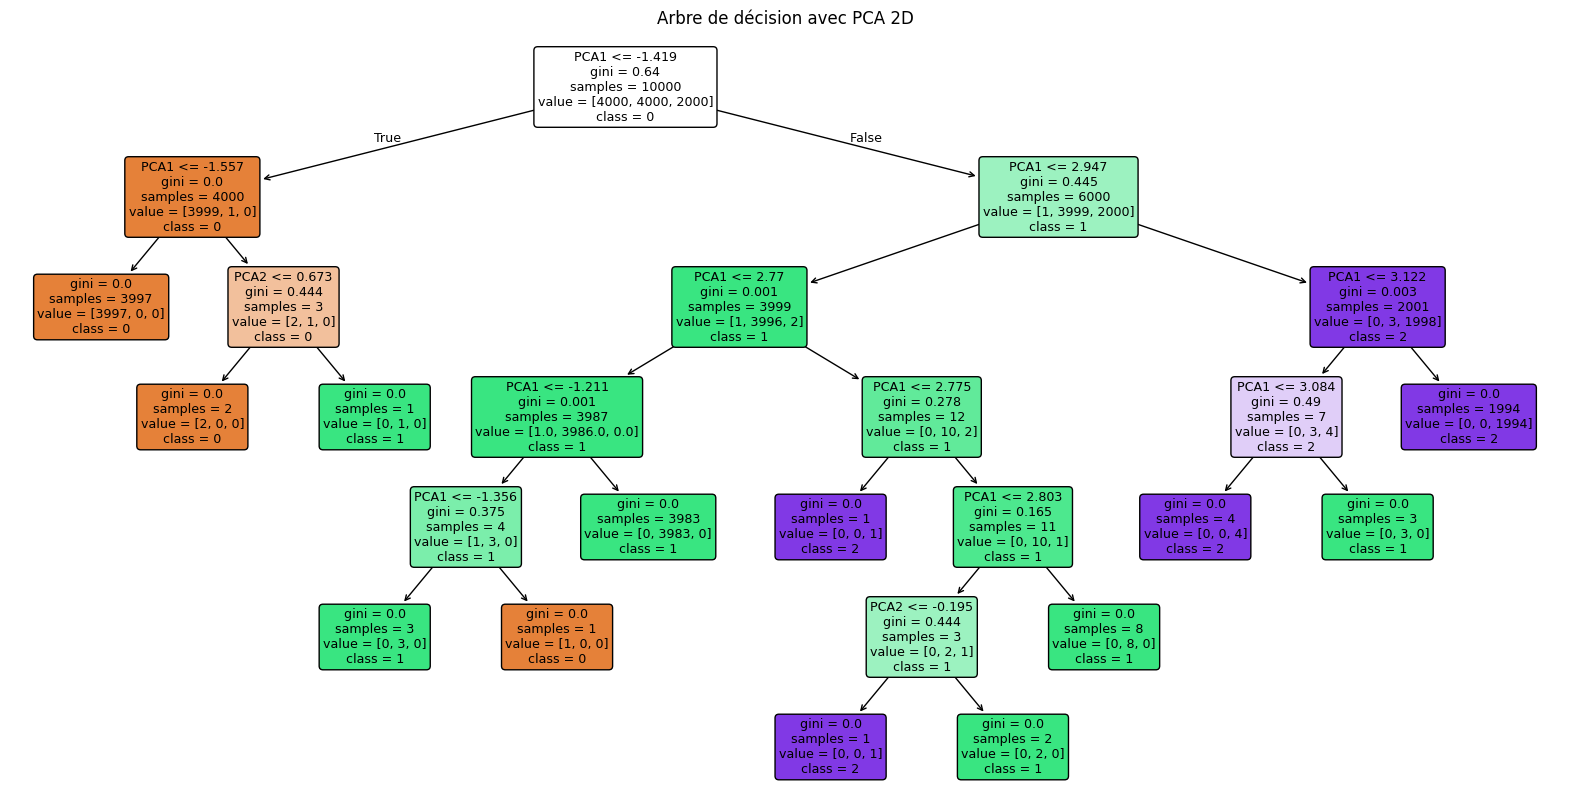

---------------------------------------------------------------------------------------------------------------------------------------


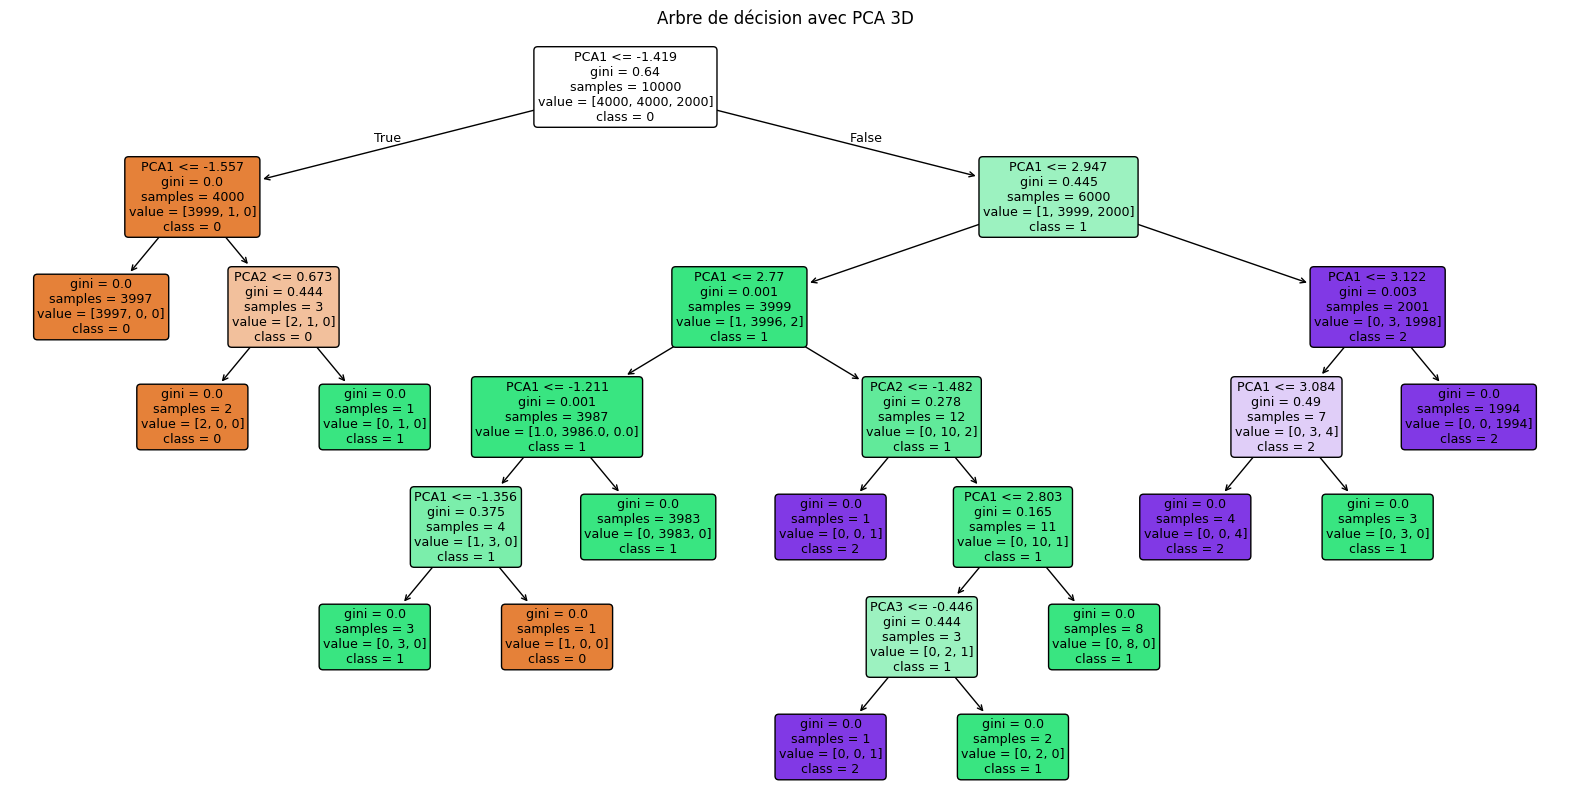

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree  # Import des librairies nécessaires pour l'arbre de décision

clf_2d = DecisionTreeClassifier(random_state=42)  # Création d'un modèle d'arbre de décision pour la PCA 2D
clf_2d.fit(X_pca_2d, y)  # Entraînement du modèle avec la PCA_2D

plt.figure(figsize=(20, 10))  # Définition de la taille du graphique
plot_tree(clf_2d, filled=True, feature_names=['PCA1', 'PCA2'], class_names=[str(c) for c in set(y)], rounded=True)  # Affichage de l'arbre de décision avec PCA 2D

plt.title("Arbre de décision avec PCA 2D")  # Ajout d'un titre au graphique
plt.show()  # Affichage de l'arbre de décision

print("---------------------------------------------------------------------------------------------------------------------------------------")

clf_3d = DecisionTreeClassifier(random_state=42)  # Création d'un modèle d'arbre de décision pour la PCA 3D
clf_3d.fit(X_pca_3d, y)  # Entraînement du modèle avec la PCA_3D

plt.figure(figsize=(20, 10))  # Définition de la taille du graphique
plot_tree(clf_3d, filled=True, feature_names=['PCA1', 'PCA2', 'PCA3'], class_names=[str(c) for c in set(y)], rounded=True)  # Affichage de l'arbre de décision avec PCA 3D
plt.title("Arbre de décision avec PCA 3D")  # Ajout d'un titre au graphique
plt.show()  # Affichage de l'arbre de décision



😯 Nous obtenons le même arbre de décision, car dans les données principales, il n’y a pas assez de bruit, ce qui lui permet de distinguer parfaitement les données entre elles.

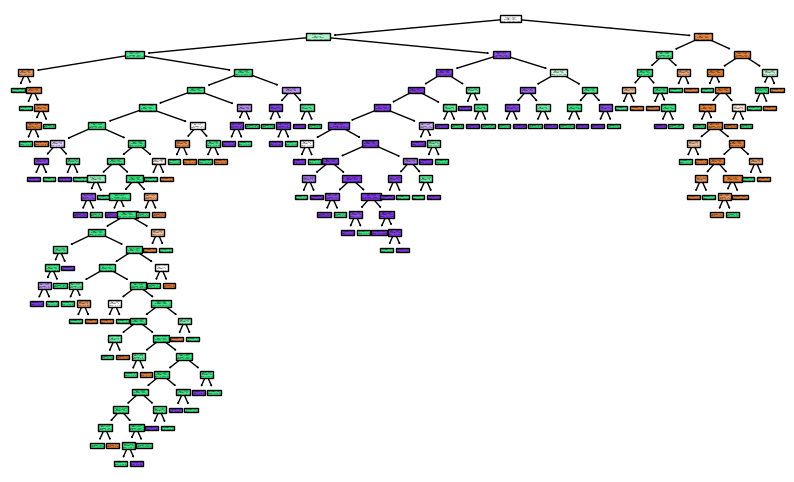

In [ ]:
X = df_scaled_dataframe.iloc[:, :-1] #Nous retirons la dernière colonne
y = df_scaled_dataframe.iloc[:, -1]  # Sélectionne uniquement la dernière colonne
model = DecisionTreeClassifier() #classificateur => un arbre de décision
model.fit(X, y) # Entraîne le modèle sur les données X et y


plt.figure(figsize=(10, 6)) #la taille du graphique
plot_tree(model, filled=True)  #l'arbre de décision avec les nœuds colorés
plt.show() #Affichage

In [ ]:
import numpy as np

# verfication de verifier si cela est normal de avoir deux fois le même abre de décision demander a chatgpt
explained_variance = np.var(X_pca_3d, axis=0) / np.var(X_pca_3d, axis=0).sum()
print("Variance expliquée par chaque composante :", explained_variance)



Variance expliquée par chaque composante : [0.84918462 0.07970878 0.0711066 ]


Nous avons fait un calcul pour démontrer de manière mathématique la raison de l’accuracy à 100 %, et cela vient du fait que la troisième composante de la PCA apporte une quantité minime d’information.